### This notebook will serve as a sandbox for bespoke visualizations for the project

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/benchmark_features.csv')

data.shape


(1321, 62)

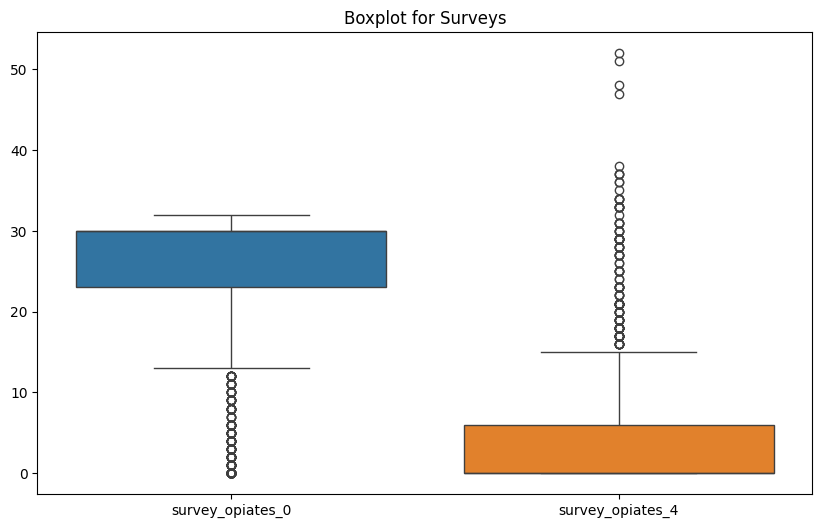

In [11]:
surveys = data[[col for col in data.columns if 'survey' in col]]

# boxplot for surveys
plt.figure(figsize=(10, 6))
sns.boxplot(data=surveys)
plt.title('Boxplot for Surveys')
plt.show()

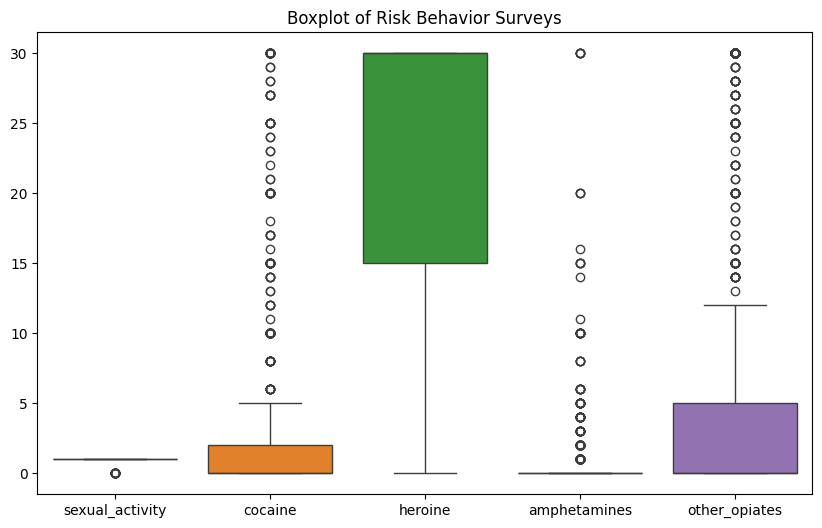

In [9]:
rbs = data[[col for col in data.columns if 'rbs' in col]]

# sns boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=rbs)
# remove the firs 4 characters from the column names
plt.xticks(ticks=range(rbs.shape[1]), labels=[col[4:] for col in rbs.columns])
plt.title('Boxplot of Risk Behavior Surveys')
# put space the xticks labels and the xlabel
plt.show()


In [12]:
methadone = data[[col for col in data.columns if 'methadone' in col]].iloc[:, :5]
methadone['total_doses'] = methadone.mean(axis=1)
buprenorphine = data[[col for col in data.columns if 'buprenorphine' in col]].iloc[:, :5]
buprenorphine['total_doses'] = buprenorphine.mean(axis=1)


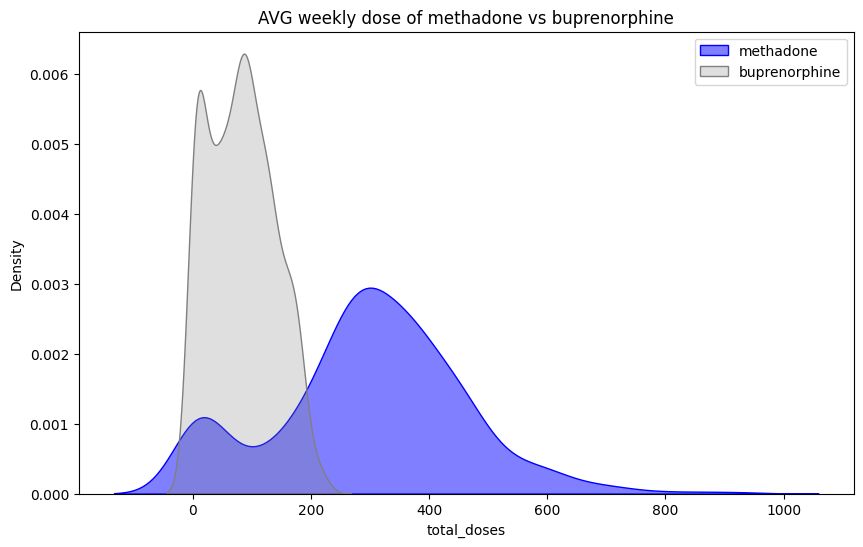

In [13]:
# remove rows that are all 0s?
methadone = methadone.loc[~(methadone==0).all(axis=1)]
buprenorphine = buprenorphine.loc[~(buprenorphine==0).all(axis=1)]

# plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(methadone['total_doses'], shade=True, color='blue', alpha=0.5)
sns.kdeplot(buprenorphine['total_doses'], shade=True, color='gray')
plt.title('AVG weekly dose of methadone vs buprenorphine')
plt.legend(['methadone', 'buprenorphine'])
plt.show()


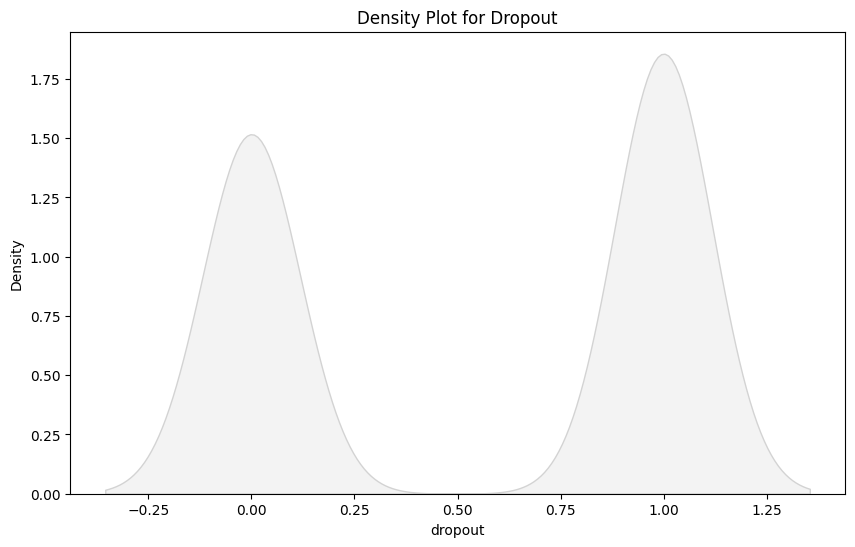

In [14]:
# create a density plot for the target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data['dropout'], shade=True, color='lightgray', label='dropout')
plt.title('Density Plot for Dropout')
plt.show()

In [15]:
# put columns in alphabetical order
data = data.reindex(sorted(data.columns), axis=1)

# create methadone_doses and buprenorphine_doses columns
data['avg_methadone_dose'] = data[[col for col in data.columns if 'methadone' in col]].mean(axis=1)
data['avg_buprenorphine_dose'] = data[[col for col in data.columns if 'buprenorphine' in col]].mean(axis=1)

data

,cows_postdose,cows_predose,dropout,dsm_alcohol,dsm_amphetamine,dsm_cannabis,dsm_cocaine,dsm_opiates,dsm_sedative,gender,...,rbs_sexual_activity,survey_opiates_0,survey_opiates_4,test_Opiate300_0,test_Opiate300_1,test_Opiate300_2,test_Opiate300_3,test_Opiate300_4,avg_methadone_dose,avg_buprenorphine_dose
0,6.0,11.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,1.0,...,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,212.8
1,1.0,8.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,1.0,...,1.0,30.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,42.4
2,5.0,8.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,1.0,...,1.0,30.0,9.0,1.0,1.0,1.0,1.0,1.0,258.0,0.0
3,9.0,11.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,2.0,...,1.0,30.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,116.8
4,6.0,11.0,1.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,2.0,...,1.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0.0,14.0,1.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,2.0,...,1.0,20.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1317,0.0,0.0,1.0,not_present,not_present,not_present,not_present,not_present,not_present,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,30.0,0.0
1318,0.0,15.0,1.0,abuse,no_diagnosis,no_diagnosis,dependence,dependence,no_diagnosis,1.0,...,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1319,0.0,16.0,1.0,no_diagnosis,dependence,abuse,dependence,dependence,no_diagnosis,1.0,...,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.4


In [10]:
# create methadone df
methadone = data[[col for col in data.columns if 'methadone' in col]]

methadone = methadone.loc[~(methadone==0).all(axis=1)]

methadone = methadone.index

methadone = data.loc[methadone].drop(columns=[col for col in data.columns if 'buprenorphine' in col])

methadone

,cows_postdose,cows_predose,dropout,dsm_alcohol,dsm_amphetamine,dsm_cannabis,dsm_cocaine,dsm_opiates,dsm_sedative,mdh_alc_withdrawal,...,rbs_other_opiates,rbs_sexual_activity,survey_opiates_0,survey_opiates_4,test_Opiate300_0,test_Opiate300_1,test_Opiate300_2,test_Opiate300_3,test_Opiate300_4,avg_methadone_dose
2,5.0,8.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,no_history,...,0.0,3.0,30.0,9.0,1.0,1.0,1.0,1.0,1.0,258.0
11,10.0,15.0,0.0,abuse,no_diagnosis,no_diagnosis,no_diagnosis,dependence,no_diagnosis,no_history,...,1.0,98.0,26.0,13.0,1.0,1.0,1.0,1.0,0.0,322.0
13,0.0,14.0,0.0,not_present,not_present,not_present,not_present,not_present,not_present,no_history,...,14.0,2.0,30.0,0.0,1.0,1.0,0.0,0.0,0.0,602.0
15,12.0,18.0,0.0,not_present,not_present,not_present,not_present,not_present,not_present,no_history,...,15.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,714.0
19,11.0,12.0,0.0,no_diagnosis,no_diagnosis,no_diagnosis,dependence,dependence,no_diagnosis,no_history,...,15.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.0,5.0,1.0,not_present,not_present,not_present,not_present,not_present,not_present,no_history,...,4.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,4.8
1302,0.0,0.0,1.0,not_present,not_present,not_present,not_present,not_present,not_present,no_history,...,0.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,13.0
1305,0.0,0.0,1.0,no_diagnosis,no_diagnosis,no_diagnosis,dependence,dependence,no_diagnosis,no_history,...,30.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,16.0
1311,0.0,9.0,1.0,no_diagnosis,no_diagnosis,no_diagnosis,dependence,dependence,no_diagnosis,no_history,...,0.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,11.0


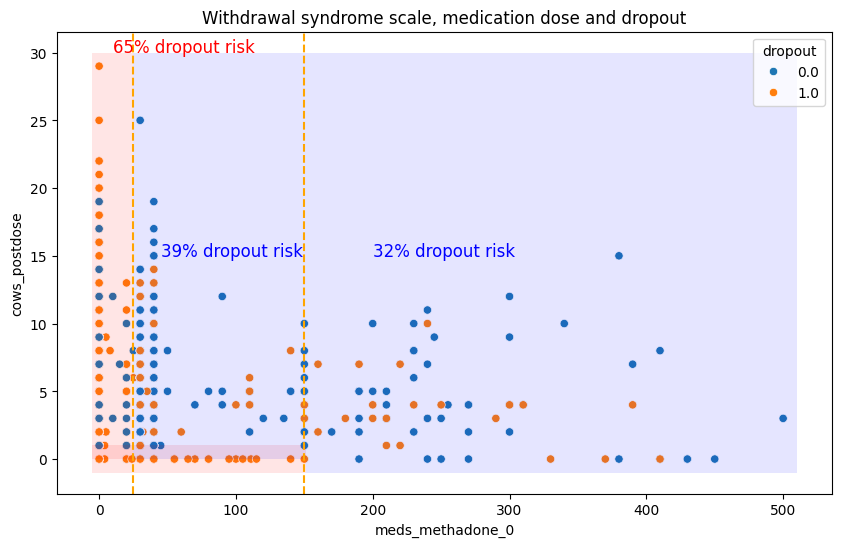

In [11]:
# examine relationship between rbs_heroine, methadone dose and and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meds_methadone_0', y='cows_postdose', hue='dropout', data=data)
plt.fill_between([-5, 25], 0, 30, color='red', alpha=0.1, edgecolor='none')
plt.fill_between([-5, 151], -1, 1, color='red', alpha=0.10, edgecolor='none')
plt.fill_between([25, 151], 0, 30, color='blue', alpha=0.10, edgecolor='none')
plt.fill_between([151, 510], -1, 30, color='blue', alpha=0.10, edgecolor='none')
plt.axvline(150, color='orange', linestyle='--')
plt.axvline(25, color='orange', linestyle='--')
# annotate the first fill between "65% dropout risk"
plt.text(10, 30, '65% dropout risk', fontsize=12, color='red')
plt.text(45, 15, '39% dropout risk', fontsize=12, color='blue')
plt.text(200, 15, '32% dropout risk', fontsize=12, color='blue')
plt.title('Withdrawal syndrome scale, medication dose and dropout')
plt.show()

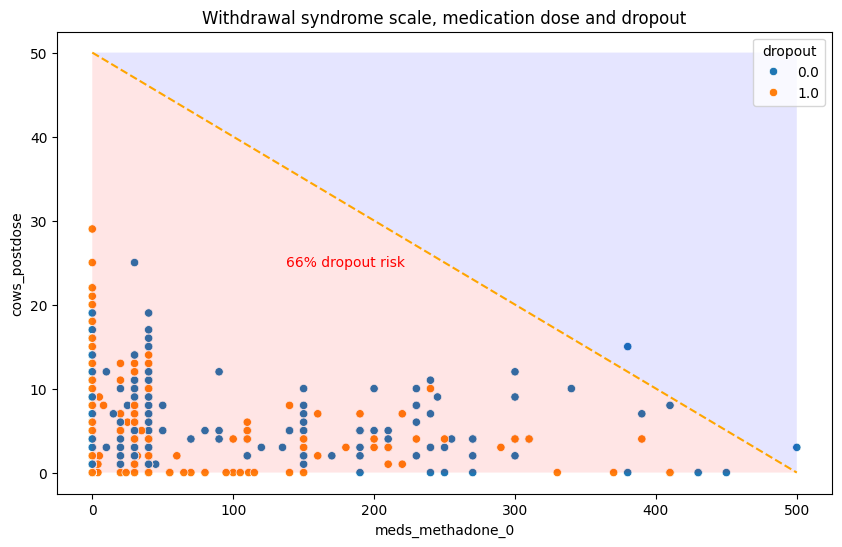

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# examine relationship between rbs_heroine, methadone dose and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meds_methadone_0', y='cows_postdose', hue='dropout', data=data)

# Define the x and y values for the diagonal lines
x_vals = [0, 500]
y_vals = [50, 0]

# Fill areas with different colors
plt.fill_between(x_vals, y_vals, 50, color='blue', alpha=0.1, edgecolor='none')  # Area below the diagonal
plt.fill_between(x_vals, 0, y_vals, color='red', alpha=0.1, edgecolor='none')  # Area above the diagonal

# Add the diagonal decision boundary
plt.plot(x_vals, y_vals, color='orange', linestyle='--')  # Diagonal line

# Annotate the first fill between "65% dropout risk"
plt.text(180, 25, '66% dropout risk', horizontalalignment='center', verticalalignment='center', color='red')

plt.title('Withdrawal syndrome scale, medication dose and dropout')
plt.xlabel('meds_methadone_0')
plt.ylabel('cows_postdose')
plt.show()

In [ ]:
data.loc[
    (data['meds_methadone_0'] <= 390) & 
    (data['cows_postdose'] <= 5)
]['dropout'].value_counts()


In [ ]:
data.loc[
        (data.cows_postdose <= 30)&
        (data.meds_methadone_0 >= 150)&
        (data.meds_methadone_0 <= 500)
        ]['dropout'].value_counts(normalize=True)

In [ ]:
data.loc[
        (data.cows_postdose <= 30)&
        (data.meds_methadone_0 <= 25)
        ]['dropout'].value_counts(normalize=True)

In [ ]:
# create bupe df
buprenorphine = data[[col for col in data.columns if 'buprenorphine' in col]]

buprenorphine = buprenorphine.loc[~(buprenorphine==0).all(axis=1)]

buprenorphine = buprenorphine.index

buprenorphine = data.loc[buprenorphine].drop(columns=[col for col in data.columns if 'methadone' in col])

buprenorphine

In [ ]:
# plot relationship between rbs_heroine, buprenorphine dose and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rbs_heroine', y='avg_buprenorphine_dose', hue='dropout', data=buprenorphine)
plt.title('Relationship between 30 days heroine use, buprenorphine dose and dropout')
plt.xlabel('Instances of Use')
plt.ylabel('Average Weekly Medication Dose')


In [ ]:
data.columns

In [ ]:
# relationship sexual activity, heroin use and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(y='rbs_sexual_activity', x='cows_predose', hue='dropout', data=data)
plt.title('Relationship between sexual activity, 30 days heroine use and dropout')
plt.xlabel('Instances of Heroine Use')
plt.ylabel('Instances of Sexual Activity')
plt.show()


In [ ]:
data.columns.tolist()

In [ ]:
# relationship, sexual activity, medication dose, dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='survey_opiates_0', y='cows_predose', hue='dropout', data=data)
# can I shade an area with a background color red?
plt.title('Relationship between sexual activity, medication dose and dropout')
plt.xlabel('Instances of Sexual Activity')
plt.ylabel('Instances of Medication Dose')
# move legend outside of plot and annotate legend
plt.legend(title='Dropout', bbox_to_anchor=(1.05, 1), loc='upper left')
# Shade the area with a background color red
# plt.fill_betweenx(y=[30, 29], x1=0, x2=26, color='red', alpha=0.3)
plt.fill_betweenx(y=[0, 35], x1=26, x2=30, color='red', alpha=0.2)
plt.fill_betweenx(y=[5, 20], x1=-1, x2=5, color='blue', alpha=0.2)
plt.fill_between(x=[10, 20], y1=10, y2=25, color='green', alpha=0.2)
plt.show()